In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
df=pd.read_csv("seattle-weather.csv")

In [37]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [38]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [39]:
df.drop('date', axis=1, inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather']) 

In [41]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [42]:
x=df.drop('temp_max', axis=1)
y=df['temp_max']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42)
}

results = []


In [45]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MSE": round(mse, 4)
    })
results_df = pd.DataFrame(results)
print("Model Evaluation Results:\n")
print(results_df)

Model Evaluation Results:

               Model  R² Score      MSE
0  Linear Regression    0.8349   9.3937
1      Decision Tree    0.7443  14.5515
2      Random Forest    0.8357   9.3524


In [46]:
y_pred= model.predict(x_test)

In [47]:
model.predict([[0,5,4.7,0]])

C:\Users\Richee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12.01])

In [48]:
model.score(x_test, y_test)

0.8356575042888199

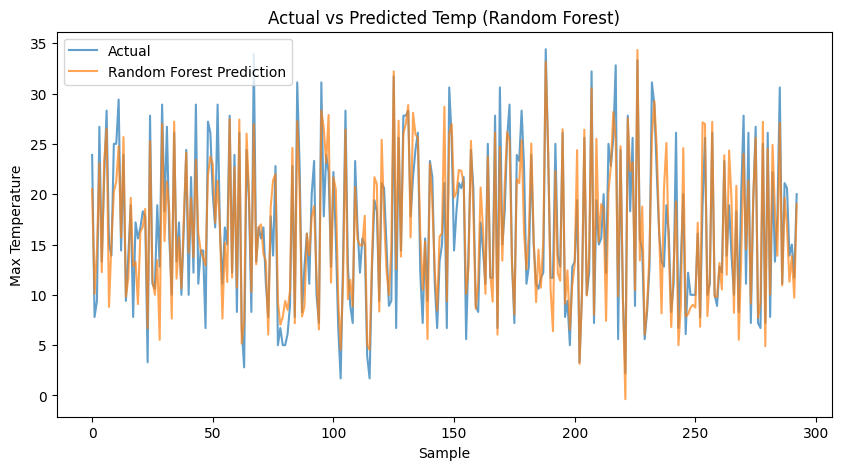

In [ ]:
best_model = models["Random Forest"]
y_pred_best = best_model.predict(x_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred_best, label="Random Forest Prediction", alpha=0.7)
plt.title("Actual vs Predicted Temp (Random Forest)")
plt.xlabel("Sample")
plt.ylabel("Max Temperature")
plt.legend()
plt.show()

In [ ]:
import pickle

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Save each model individually
with open("linear_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)

with open("decision_tree.pkl", "wb") as f:
    pickle.dump(decision_tree, f)

with open("random_forest.pkl", "wb") as f:
    pickle.dump(random_forest, f)

print(" All models saved separately")


 All models saved separately
